<a href="https://colab.research.google.com/github/emmaewade/COVID-Time-Series/blob/main/ew_hmmscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install hmmlearn

### **Prepare Data**

In [ ]:

##########owd data##############################

owd = pd.read_csv("covid-data.csv")
owd_us =  owd.loc[owd['location'] == "United States"]
cut_owd = owd_us.loc[:,['date', 'new_cases_smoothed','hosp_patients', 'icu_patients', 'new_vaccinations_smoothed']]

cut_owd = cut_owd.dropna()

cut_2022 = cut_owd[cut_owd['date'].str.contains('2022-')]
cut_2022 = cut_2022.loc[:, ['new_cases_smoothed','hosp_patients','new_vaccinations_smoothed']]
cut_2022 = cut_2022.to_numpy()

cut_2021 = cut_owd[cut_owd['date'].str.contains('2021-')]
cut_2021 = cut_2021.loc[:, ['new_cases_smoothed','hosp_patients','new_vaccinations_smoothed']]
cut_2021 = cut_2021.to_numpy()

cut_july = cut_owd[cut_owd['date'].str.contains('2021-01-|2021-02-|2021-03-|2021-04-|2021-05-|2021-06-')]
cut_july = cut_july.loc[:, ['new_cases_smoothed','hosp_patients','new_vaccinations_smoothed']]
cut_july = cut_july.to_numpy()

cut_aug = cut_owd[cut_owd['date'].str.contains('2021-07-|2021-08-|2021-09-|2021-10-|2021-11-|2021-12-')]
cut_aug = cut_aug.loc[:, ['new_cases_smoothed','hosp_patients','new_vaccinations_smoothed']]
cut_aug = cut_aug.to_numpy()

cut_all = cut_owd.loc[:, ['new_cases_smoothed','hosp_patients','new_vaccinations_smoothed']]
cut_all = cut_all.to_numpy()
            

### **Predicting End of 2021 -- should probably delete**


In [ ]:
#finding parameters
scores = list()
models = list()

for n_component in range(1,6):
    # define our hidden Markov model
    
    from hmmlearn.hmm import GaussianHMM
    model = GaussianHMM(n_components=n_component, covariance_type = "full", n_iter = 10)
    #model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    model.fit(cut_july)
    #model.fit(cut_all)
    models.append(model)
    #scores.append(model.score(X[X.shape[0] // 2:]))
    scores.append(model.score(cut_july))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')
          
          # get the best model
          
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

hidden_states = model.predict(cut_july)

scores = list()
samples = list()
for i in range(1,101):
    X, Z = model.sample(182, currstate = hidden_states[-1])
    scores.append(model.score(X))
    samples.append(X)

prediction = samples[np.argmax(scores)]

Converged: True	Score: -6780.250616147756
Converged: True	Score: -6380.740781136818
Converged: True	Score: -6231.910266080188
Converged: True	Score: -6121.5527490442355
Converged: True	Score: -5884.283849436708
The best model had a score of -5884.283849436708 and 5 states


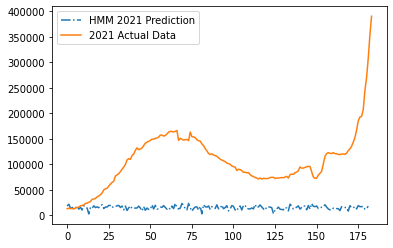

In [ ]:
plt.plot(prediction[:,0], label = "HMM 2021 Prediction", linestyle = "-.")
#plt.plot(cut_2021[:, 0], label = "2021 Training Data", linestyle = "-")
plt.plot(cut_aug[:,0], label = "2021 Actual Data", linestyle = "-")

plt.legend()
plt.show()

### **Predicting 2022**

In [ ]:
#finding parameters
scores = list()
models = list()
for n_component in range(1,6):
    # define our hidden Markov model
    
    from hmmlearn.hmm import GaussianHMM
    model = GaussianHMM(n_components=n_component, covariance_type = "full", n_iter = 10)
    #model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    model.fit(cut_2021)
    #model.fit(cut_all)
    models.append(model)
    #scores.append(model.score(X[X.shape[0] // 2:]))
    scores.append(model.score(cut_2022))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')
          
          # get the best model
          
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

hidden_states = model.predict(cut_2021)

scores = list()
samples = list()
states = list()
for i in range(1,501):
    X, Z = model.sample(80, currstate = hidden_states[-1])
    scores.append(model.score(X))
    samples.append(X)
    states.append(Z)

prediction = samples[np.argmax(scores)]
state = states[np.argmax(scores)]
print(prediction)


Converged: True	Score: -8059.018060823884
Converged: True	Score: -6114.5338024038965
Converged: True	Score: -4889.960094962396
Converged: True	Score: -4187.853908519202
Converged: True	Score: -4363.148125207511
The best model had a score of -4187.853908519202 and 4 states
[[ 2.52256279e+05  1.06769423e+05  6.98065890e+05]
 [ 2.29288736e+05  8.86618436e+04  1.13472092e+06]
 [ 1.52711731e+05  9.01084135e+04  1.00075221e+06]
 [ 1.91062605e+05  1.13820589e+05  1.08057699e+06]
 [ 7.80773799e+04  4.62690325e+04  5.75514789e+05]
 [ 8.24747020e+04  5.47492300e+04  7.62837087e+05]
 [ 1.94327171e+05  1.14745520e+05  9.31904305e+05]
 [-1.77286773e+04 -5.85986573e+03  7.87317047e+05]
 [-1.37192892e+02  2.96474116e+03  5.51156019e+05]
 [ 6.99974936e+04  4.54439656e+04  6.49969182e+05]
 [ 1.75413737e+05  1.02983330e+05  4.28487691e+05]
 [-3.00030160e+04 -1.08410596e+04  4.44785384e+05]
 [ 5.61057854e+04  3.95112446e+04  9.49412812e+05]
 [ 5.68501740e+04  3.97984322e+04  7.94457617e+05]
 [-1.35291819

[]

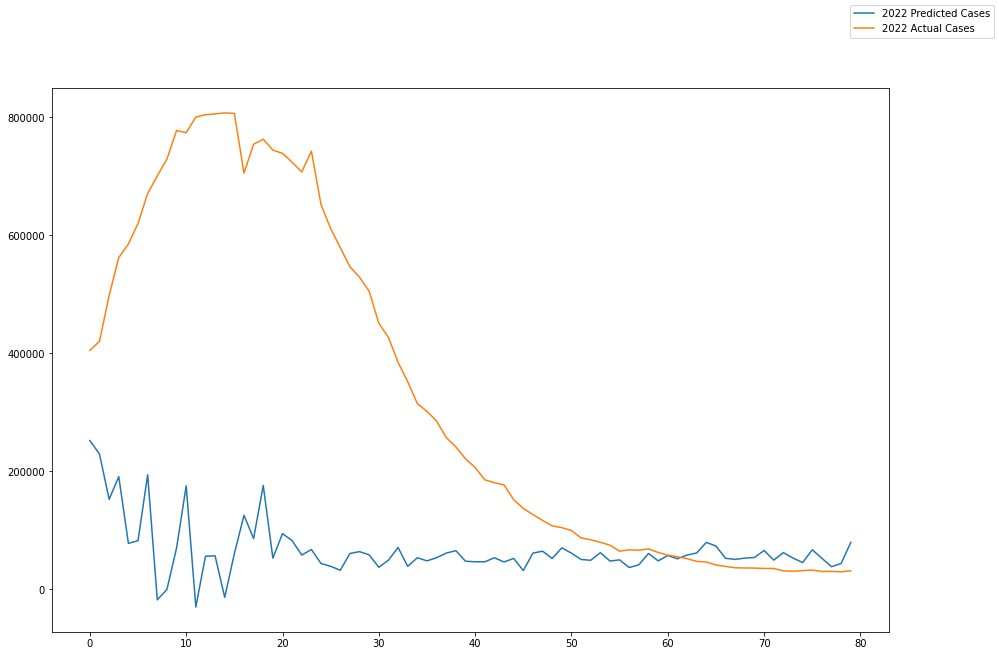

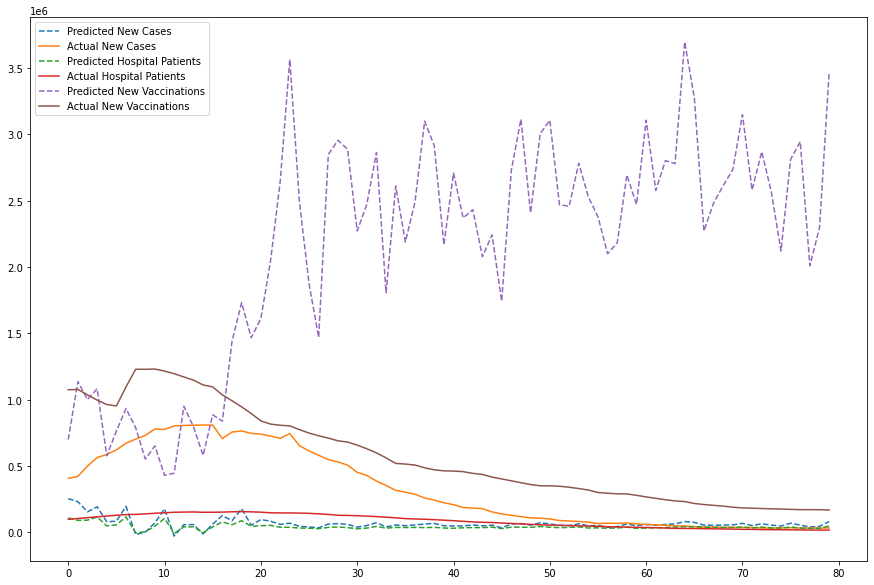

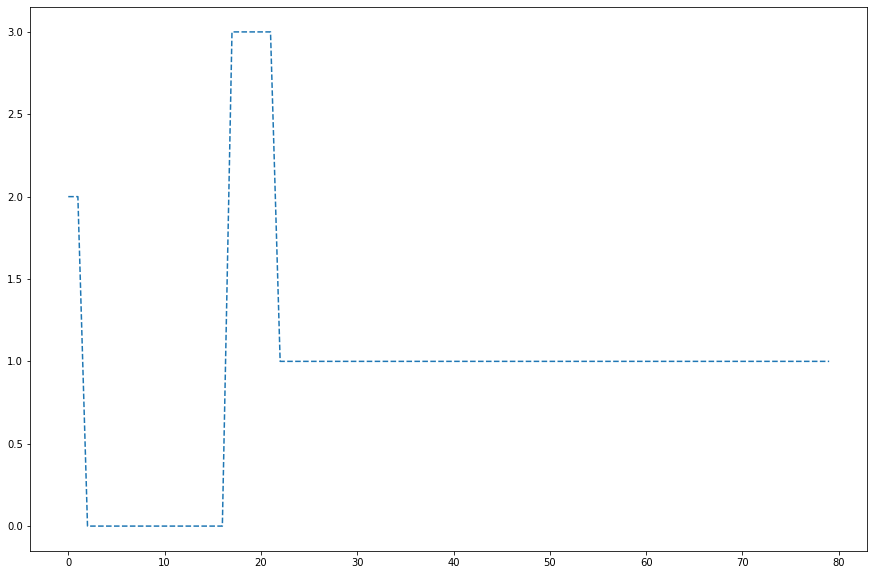

In [ ]:
from google.colab import files

figure = plt.figure(figsize=(15,10))
plt.plot(prediction[:,0], label = "2022 Predicted Cases", linestyle = "-")
plt.plot(cut_2022[:, 0], label = "2022 Actual Cases", linestyle = "-")

figure.legend()
figure.show()

#figure.savefig('caseprediction.png')
#files.download('caseprediction.png')

figure = plt.figure(figsize=(15,10))

plt.plot(prediction[:,0], label = "Predicted New Cases", linestyle ="--")
plt.plot(cut_2022[:,0], label = "Actual New Cases", linestyle ="-")

plt.plot(prediction[:, 1], label = "Predicted Hospital Patients", linestyle = "--")
plt.plot(cut_2022[:, 1], label = "Actual Hospital Patients", linestyle = "-")

plt.plot(prediction[:, 2], label = "Predicted New Vaccinations", linestyle = "--")
plt.plot(cut_2022[:, 2], label = "Actual New Vaccinations", linestyle = "-")

plt.legend()
figure.show()

figure = plt.figure(figsize=(15,10))
plt.plot(state, label = "Predicted State Sequence", linestyle ="--")


plt.plot()

#figure.savefig('allprediction.png')
#files.download('allprediction.png')

### **Predicting Next Month**







In [ ]:
#finding parameters
scores = list()
models = list()

for n_component in range(1,100):
    # define our hidden Markov model
    
    from hmmlearn.hmm import GaussianHMM
    model = GaussianHMM(n_components=n_component, covariance_type = "full", n_iter = 10)
    #model.fit(cut_all[:cut_all.shape[0] // 2])  # 50/50 train/validate
    model.fit(cut_all)
    #model.fit(cut_all)
    models.append(model)
    #scores.append(model.score(cut_all[cut_all.shape[0] // 2:]))
    scores.append(model.score(cut_all))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')
          
          # get the best model
          
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

hidden_states = model.predict(cut_all)

scores = list()
samples = list()
states = list()
for i in range(1,501):
    X, Z = model.sample(80, currstate = hidden_states[-1])
    scores.append(model.score(X))
    samples.append(X)
    states.append(Z)

prediction = samples[np.argmax(scores)]
state = states[np.argmax(scores)]


Converged: True	Score: -18403.350523569363
Converged: True	Score: -17369.348700210106
Converged: True	Score: -16926.683354285185
Converged: True	Score: -16615.028875929987
Converged: True	Score: -16338.65645548597
The best model had a score of -16338.65645548597 and 5 states


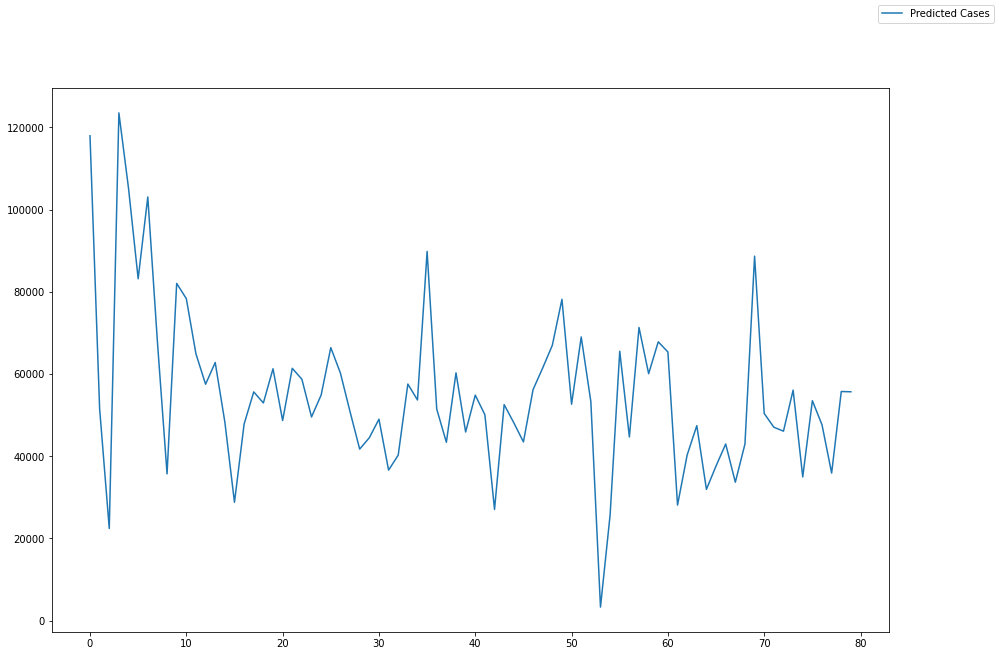

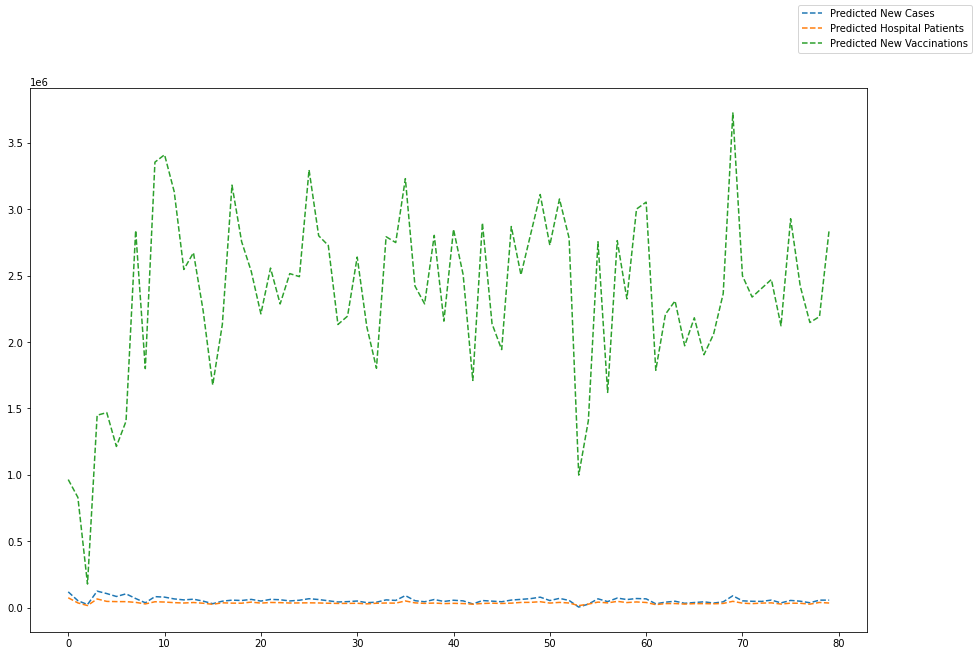

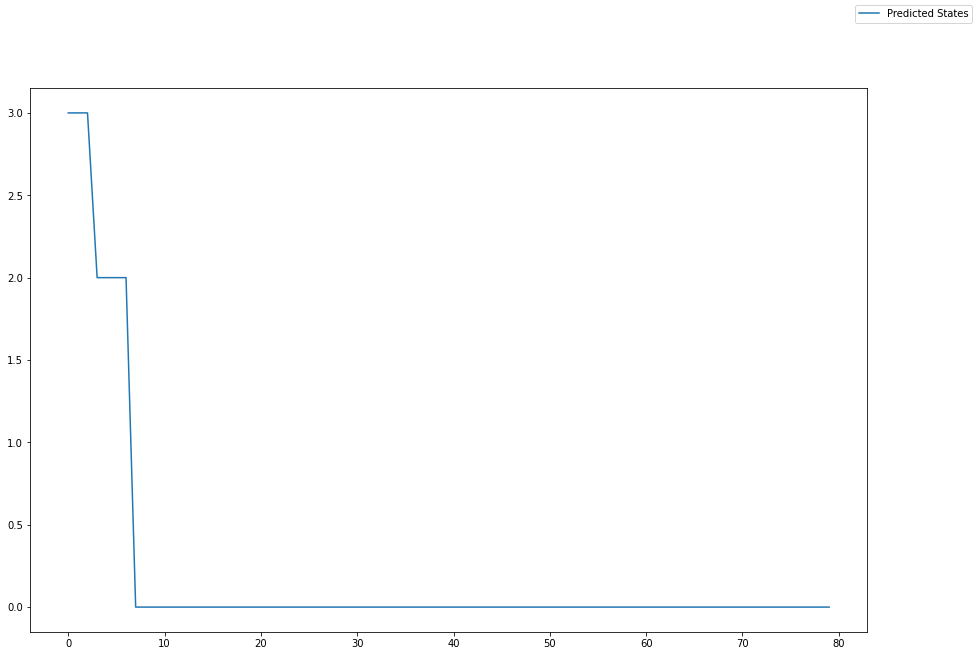

In [ ]:
from google.colab import files

figure = plt.figure(figsize=(15,10))
plt.plot(prediction[:,0], label = "Predicted Cases", linestyle = "-")
#plt.plot(cut_all[:, 0], label = "Training Data", linestyle = "-")

figure.legend()
figure.show()

#figure.savefig('caseprediction.png')
#files.download('caseprediction.png')

figure = plt.figure(figsize=(15,10))
plt.plot(prediction[:,0], label = "Predicted New Cases", linestyle ="--")

plt.plot(prediction[:, 1], label = "Predicted Hospital Patients", linestyle = "--")

plt.plot(prediction[:, 2], label = "Predicted New Vaccinations", linestyle = "--")

figure.legend()
figure.show()

#figure.savefig('allprediction.png')
#files.download('allprediction.png')

figure = plt.figure(figsize=(15,10))
plt.plot(state, label = "Predicted States", linestyle ="-")

figure.legend()
figure.show()


### **Recreating 2021**



In [ ]:
#finding parameters
scores = list()
models = list()

for n_component in range(1,6):
    # define our hidden Markov model
    
    from hmmlearn.hmm import GaussianHMM
    model = GaussianHMM(n_components=n_component, covariance_type = "full", n_iter = 10)
    #model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    model.fit(cut_2021)
    #model.fit(cut_all)
    models.append(model)
    #scores.append(model.score(X[X.shape[0] // 2:]))
    scores.append(model.score(cut_2021))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')
          
          # get the best model
          
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

X, Z = model.sample(365)


Converged: True	Score: -13941.045499595824
Converged: True	Score: -13527.298643586111
Converged: True	Score: -13176.204210976792
Converged: True	Score: -12802.983576319495
Converged: True	Score: -12702.794178504959
The best model had a score of -12702.794178504959 and 5 states


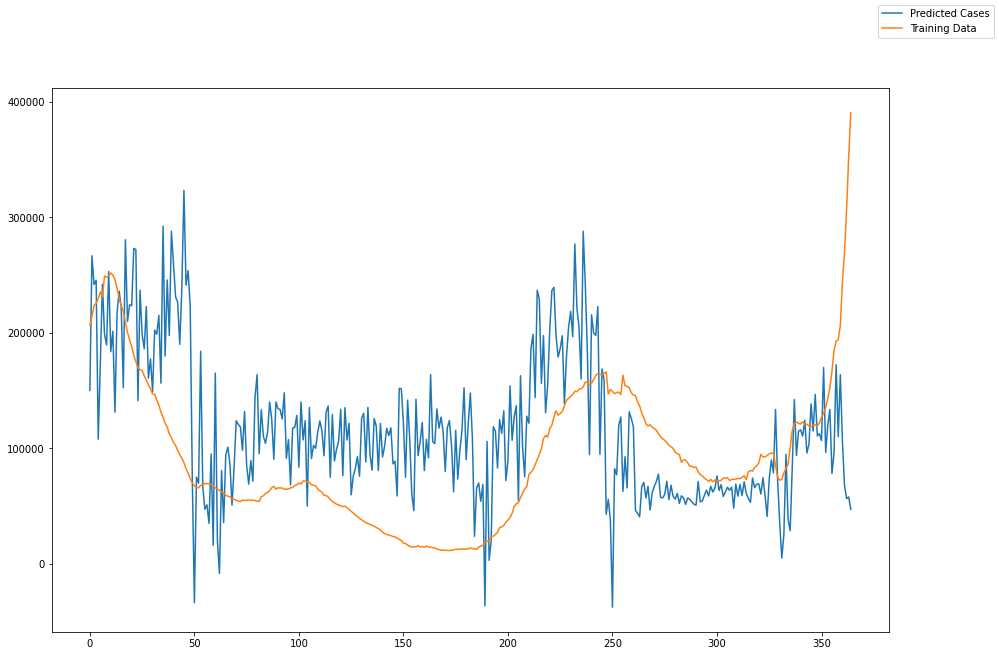

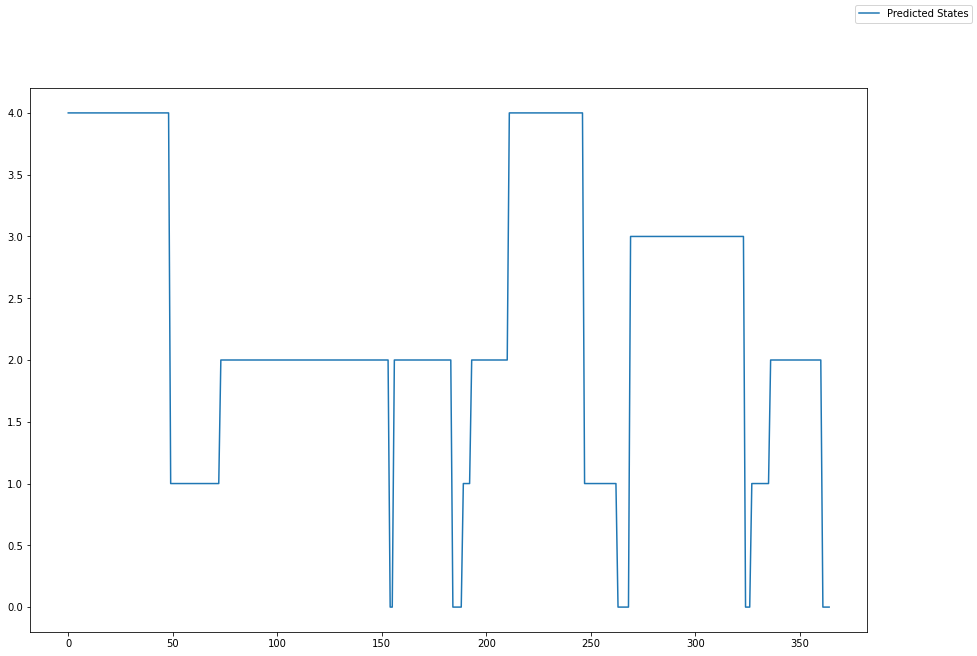

In [ ]:
figure = plt.figure(figsize=(15,10))
plt.plot(X[:,0], label = "Predicted Cases", linestyle = "-")
plt.plot(cut_2021[:, 0], label = "Training Data", linestyle = "-")

figure.legend()
figure.show()

figure = plt.figure(figsize=(15,10))
plt.plot(Z, label = "Predicted States", linestyle = "-")

figure.legend()
figure.show()
